In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read test-train csv

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ML/Lec/Lec 56 DL /train.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ML/Lec/Lec 56 DL /test.csv")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## shape of datasets

In [ ]:
df_train.shape

(42000, 785)

In [ ]:
df_test.shape

(28000, 784)

# null values in dataset

In [ ]:
df_train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
df_test.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


# duplicates in Datasets

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.duplicated().sum()

0

# getting columns values in both dataset

In [ ]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

# count of repeted values

In [ ]:
df_train['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


# plotting distribution of digits through dataset

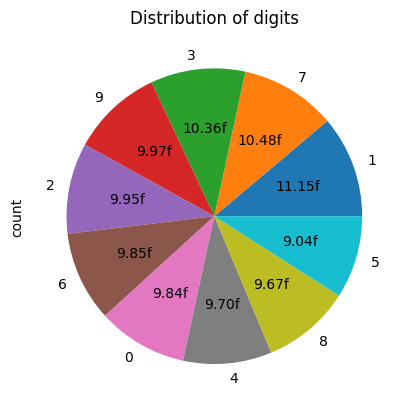

In [ ]:
df_train['label'].value_counts().plot(kind='pie',autopct='%.2ff')
plt.title('Distribution of digits')
plt.show()

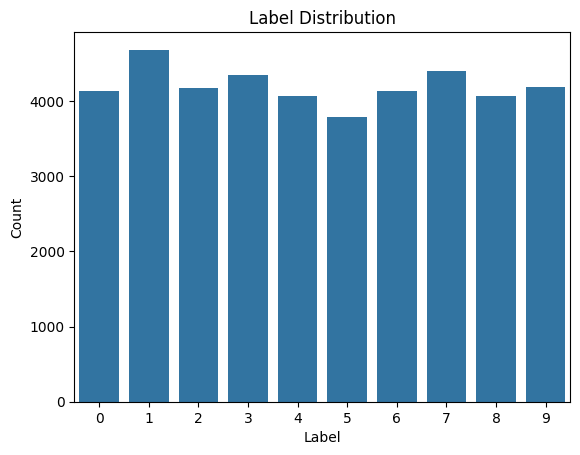

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get value counts and prepare data for plotting
value_counts = df["label"].value_counts()
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['label', 'count']

# Plot the barplot
sns.barplot(x='label', y='count', data=value_counts_df)

# Optional: Add labels and title for better readability
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')

plt.show()


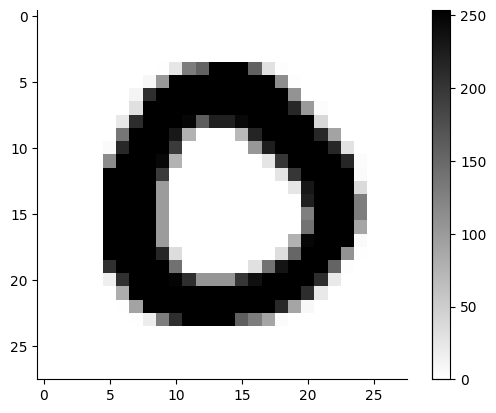

In [ ]:
digit=df_train.loc[4,'pixel0':]
arr =np.array(digit)

image_arr=np.reshape(arr,(28,28))
dig_img=plt.imshow(image_arr,cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()

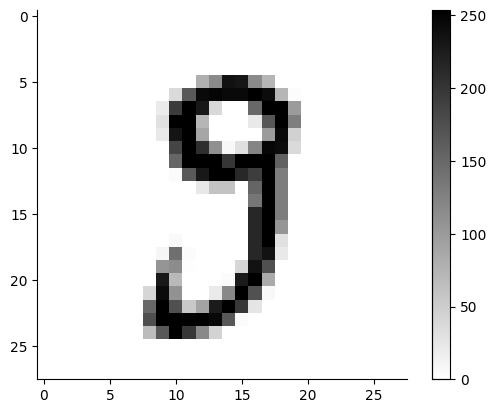

In [ ]:
digit=df_train.loc[40,'pixel0':]
arr =np.array(digit)

image_arr=np.reshape(arr,(28,28))
dig_img=plt.imshow(image_arr,cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()

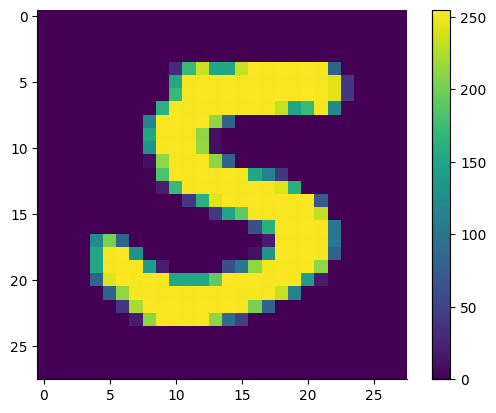

In [ ]:
digit=df_train.loc[99,'pixel0':]
arr =np.array(digit)

image_arr=np.reshape(arr,(28,28))
dig_img=plt.imshow(image_arr,cmap='viridis')
plt.colorbar(dig_img)
sns.despine()

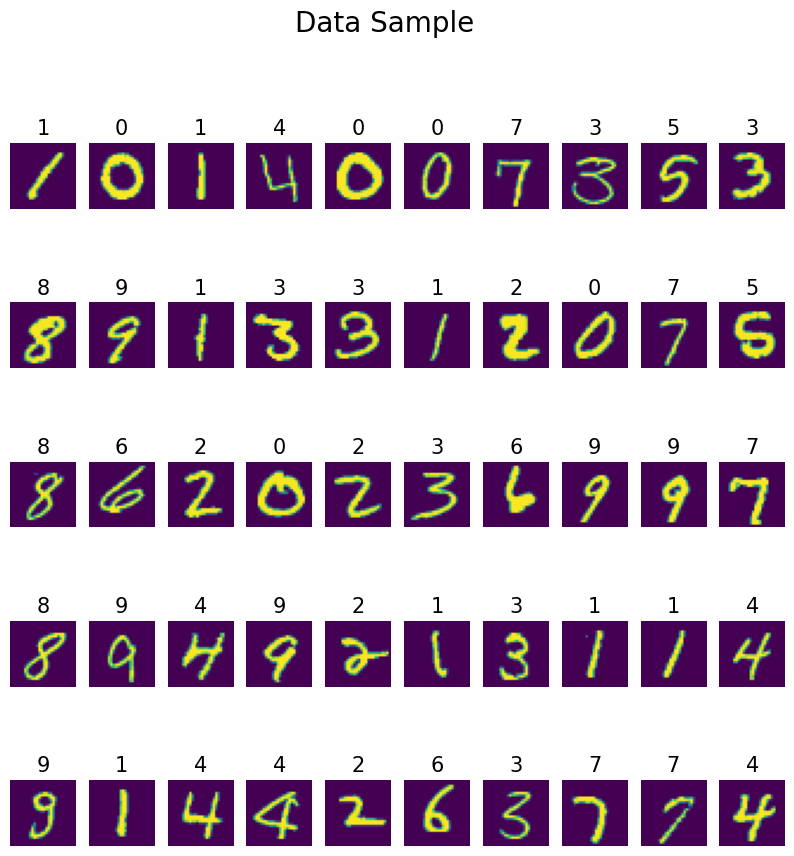

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(10, 10))
i=0
for row in range (5):
  for col in range (10):
    axs[row,col].imshow(df_train.iloc[i,1:].values.reshape(28,28), cmap='viridis')
    axs[row,col].set_title(df_train.iloc[i,0],fontsize=15)
    axs[row,col].axis('off')
    i+=1
plt.suptitle('Data Sample',fontsize=20)
plt.show()

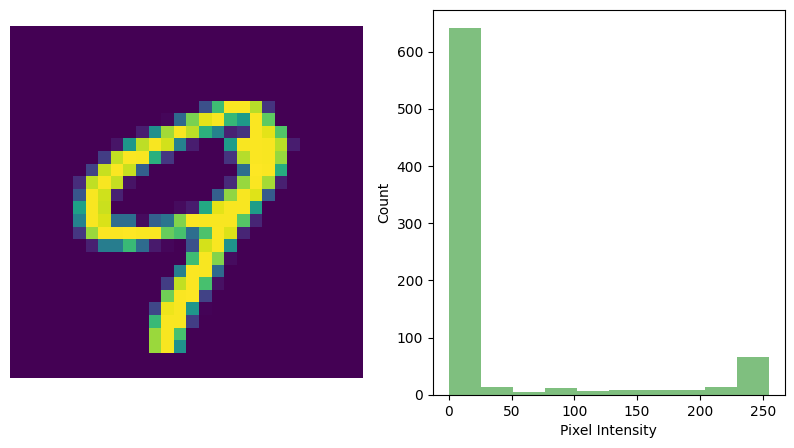

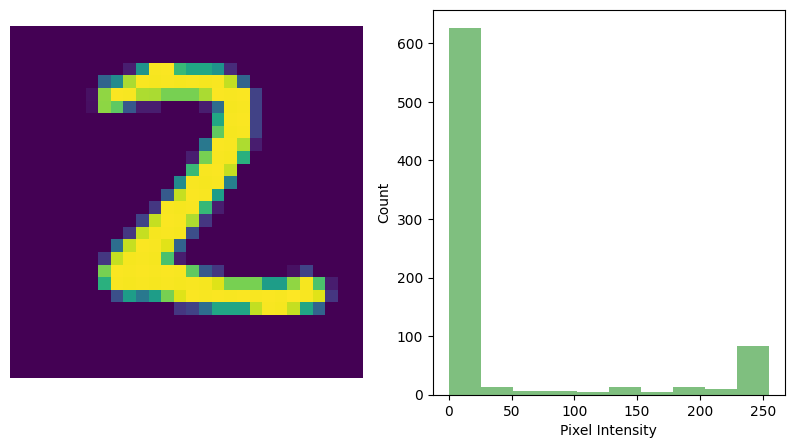

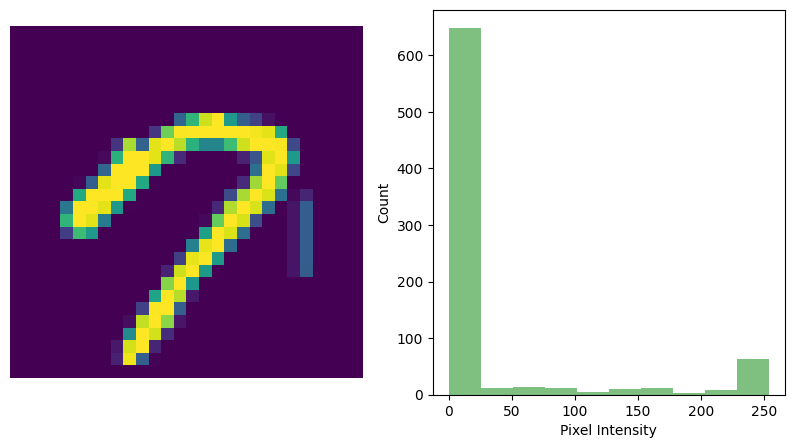

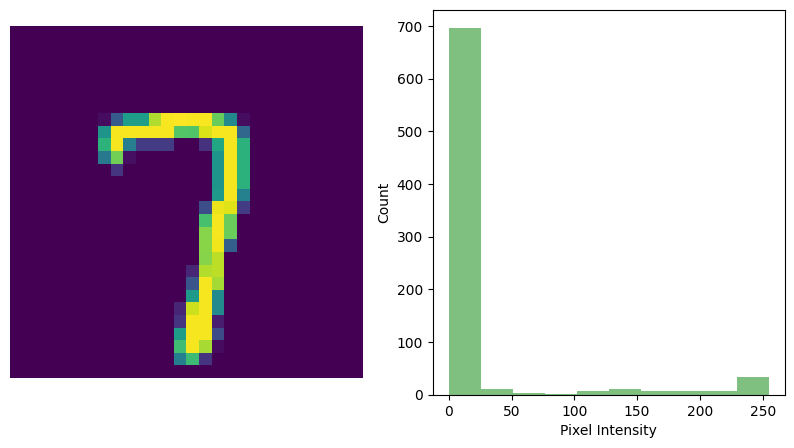

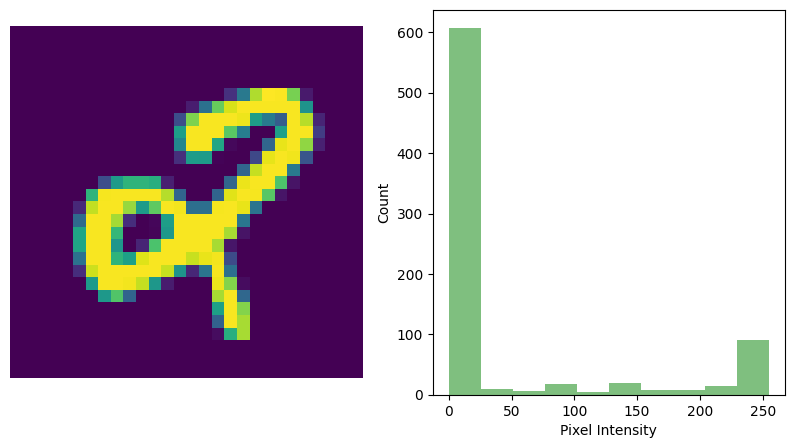

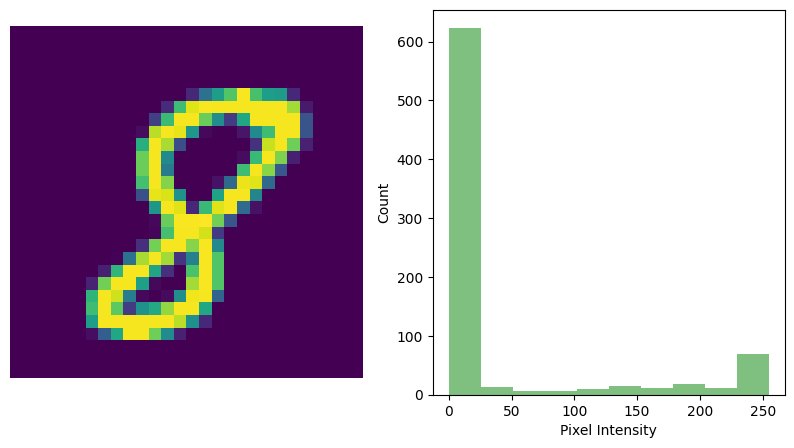

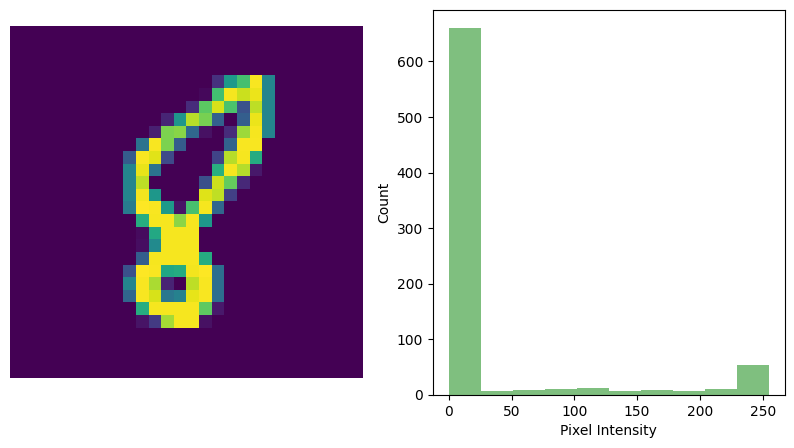

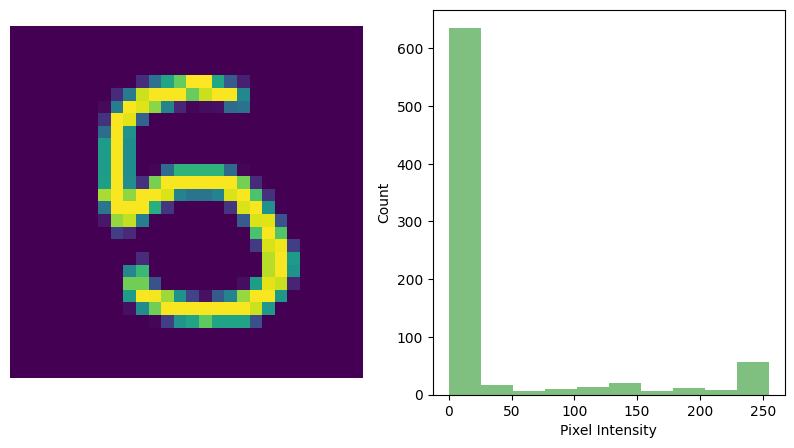

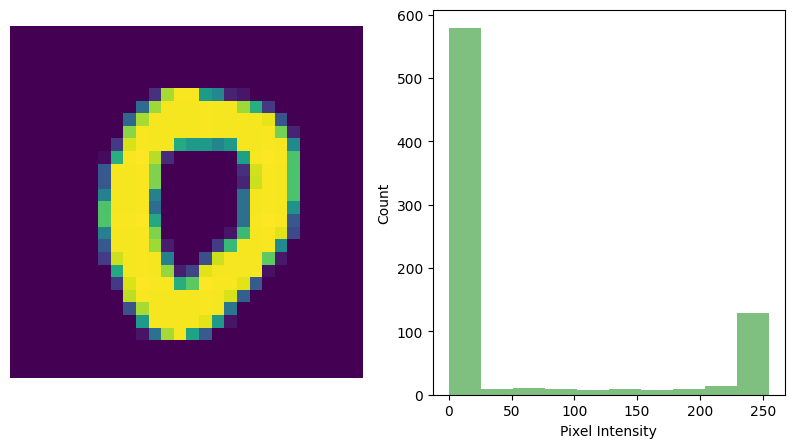

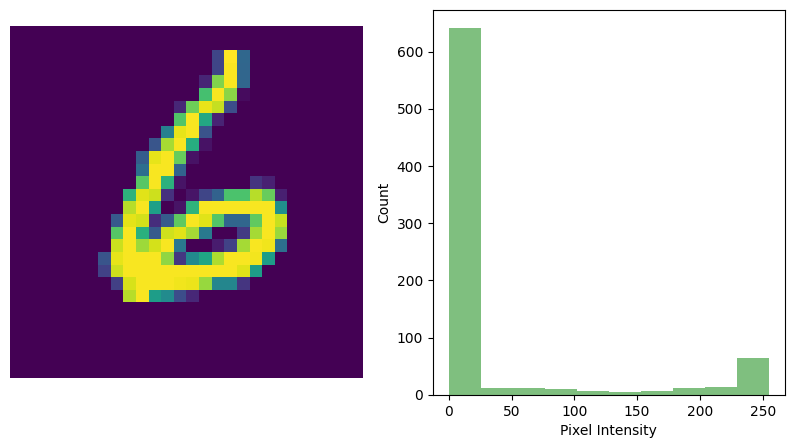

In [ ]:
def plotHist(img):
  img = df_train.iloc[img, 1:].values.reshape(28,28)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='viridis')
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, color='green', alpha=0.5)

for i in range(100,110):
  plotHist(i)

In [ ]:
for i in (df_train.columns):
  print(df_train[i].value_counts())

Streaming output truncated to the last 5000 lines.
48         1
5          1
Name: count, dtype: int64
pixel423
0      41807
2          8
254        8
255        7
57         5
       ...  
79         1
139        1
145        1
221        1
178        1
Name: count, Length: 119, dtype: int64
pixel424
0      40802
253       78
254       53
255       52
128       21
       ...  
199        1
211        1
161        1
237        1
81         1
Name: count, Length: 233, dtype: int64
pixel425
0      37779
253      417
254      295
255      194
252      142
       ...  
223        3
239        2
119        2
204        2
90         2
Name: count, Length: 256, dtype: int64
pixel426
0      33979
253     1209
252      563
254      531
255      239
       ...  
165        7
75         7
179        6
148        6
124        5
Name: count, Length: 256, dtype: int64
pixel427
0      29426
253     2148
254     1060
252      986
255      356
       ...  
78        10
163       10
129       10
148    

In [ ]:
X=df_train.drop(['label'],axis=1)

In [ ]:
y=df_train['label']

In [ ]:
# Split data into features and labels
X = X.values  # Pixel values
y = y.values   # Labels (digits)


In [ ]:
# Normalize the pixel values (0-255 -> 0-1)
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)



In [ ]:
# Flatten labels if multi-dimensional and convert to one-hot encoding
y = y.ravel()


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# num_classes = len(np.unique(y))
y=to_categorical(y,10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# model build

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    verbose=1
)


val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 123ms/step - accuracy: 0.7677 - loss: 0.7373 - val_accuracy: 0.9658 - val_loss: 0.1217
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 125ms/step - accuracy: 0.9585 - loss: 0.1399 - val_accuracy: 0.9775 - val_loss: 0.0778
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step - accuracy: 0.9704 - loss: 0.1007 - val_accuracy: 0.9771 - val_loss: 0.0720
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 124ms/step - accuracy: 0.9735 - loss: 0.0862 - val_accuracy: 0.9818 - val_loss: 0.0630
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.9771 - loss: 0.0744 - val_accuracy: 0.9848 - val_loss: 0.0518
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step - accuracy: 0.9762 - loss: 0.0742 - val_accuracy: 0.9850 - val_loss: 0.0507
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 123ms/step - accuracy: 0.9814 - loss: 0.0616 - val_accuracy: 0.9845 - val_loss: 0.0496
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 124ms/step - accuracy: 0.9821 - loss: 0

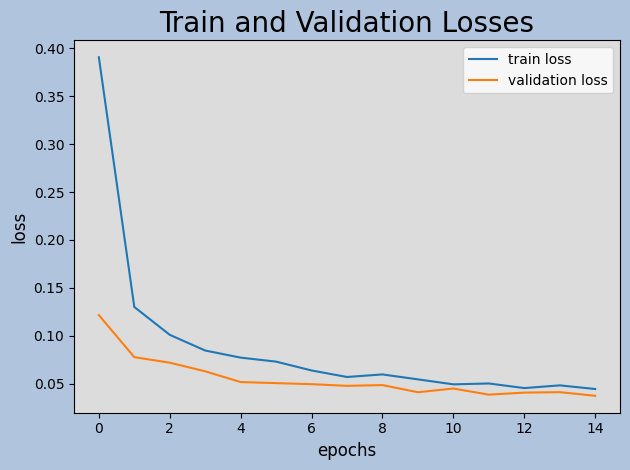

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

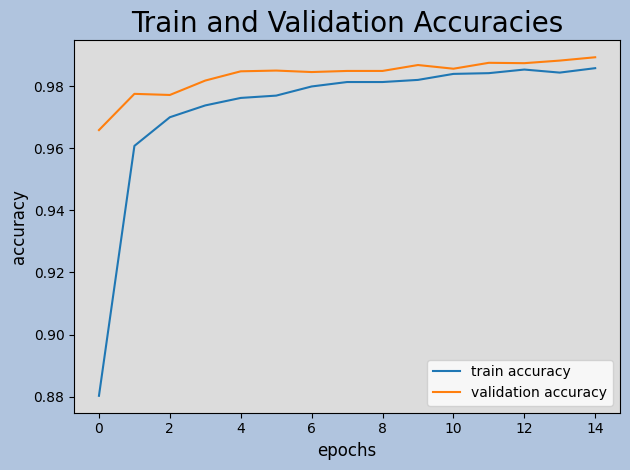

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

## Validation Accuracy: 98.93%